In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

In [66]:
#Read the data into dataframe
car_df = pd.read_csv('newCardata.csv')
car_features = pd.read_csv('finalDataPreprocess.csv')
car_label = car_df['FraudFound']

car_features.head()


,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,...,AddressChange-Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,RepNumber,Deductible,DriverRating,DayDiff
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.733333,0.00,0.000000,0.000000
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0.933333,0.25,1.000000,0.013587
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0.400000,0.25,0.666667,0.035326
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.200000,0.25,0.333333,0.054348
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0.133333,0.25,0.000000,0.040761


In [67]:
#change the label of the data
labelNo = LabelEncoder()
car_df['FraudFound'] = labelNo.fit_transform(car_df['FraudFound'].astype('str'))
car_label = car_df['FraudFound']
print(car_label.shape)
#print(car_label)

(15419,)


In [68]:
#first make the data standarised before applying the PCA
features = StandardScaler().fit_transform(car_features)

#divide the data into training and testing.
X_train,X_test,y_train,y_test = train_test_split(car_features,car_label,random_state=3,test_size=0.25)

print(type(features))
print(features.shape)

<class 'numpy.ndarray'>
(15419, 97)


In [69]:
#applying PCA
pca = PCA(.95)
pca.fit(X_train)
newX_train = pca.transform(X_train)
newX_test = pca.transform(X_test)
print(type(newfeatures))
print(newfeatures.shape)


<class 'numpy.ndarray'>
(15419, 69)


In [70]:
#explaining the variacne retained in the data after PCA.
a = pca.explained_variance_ratio_
print(sum(a))

0.951260334616


In [71]:
#model object
model = RandomForestClassifier(n_estimators=100)


In [72]:
#train the model

model.fit(newX_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
#plotting the feature importance of the model
'''
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()
'''

'\nimportances = model.feature_importances_\nstd = np.std([tree.feature_importances_ for tree in model.estimators_],\n             axis=0)\nindices = np.argsort(importances)[::-1]\n\n# Print the feature ranking\nprint("Feature ranking:")\n\nfor f in range(X_train.shape[1]):\n    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))\n\n# Plot the feature importances of the forest\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(X_train.shape[1]), importances[indices],\n       color="r", yerr=std[indices], align="center")\nplt.xticks(range(X_train.shape[1]), indices)\nplt.xlim([-1, X_train.shape[1]])\nplt.show()\n'

In [60]:
print('Random forest classifier:')
predicted = model.predict(newX_test)
print(type(predicted),predicted.shape,predicted)
print('Accuracy is ',round(accuracy_score(y_test,model.predict(newX_test)) * 100,2))


Random forest classifier:
<class 'numpy.ndarray'> (3855,) [0 0 0 ..., 0 0 0]
Accuracy is  93.41


In [61]:
print(predicted)

[0 0 0 ..., 0 0 0]


In [62]:
# calculating specifity and sensitivity
# 0  := Negative
# 1 := Positive
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[3599   10]
 [ 244    2]]


In [32]:
TN, FP, FN, TP = cm.ravel()

In [63]:
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)
print("TP:",TP)

print("Accuracy:",(TP+TN)/(TP+FP+FN+TN)*100)
print("Sensitivity:",TP/(TP+FN)*100)
print("Specificity:",TN/(TN+FP)*100)

TN: 3567
FP: 56
FN: 150
TP: 3475
Accuracy: 97.1578366446
Sensitivity: 95.8620689655
Specificity: 98.4543196246


In [34]:

#converting pandas.core.series.Series to numpy.ndarray
print(type(y_test),type(predicted))
ytest = pd.Series(y_test).values
print((ytest.shape[0]))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
3855


In [35]:
#find the index where both are 1.
count = 0
fault = 0
predictedfault = 0
for i in range(predicted.shape[0]):
    if((predicted[i] == 1) and (ytest[i] == 1)):
        count += 1
    if(ytest[i] == 1):
        fault += 1
    if(predicted[i]==1):
        predictedfault += 1
print("No of fraud cases:",fault)
print("No of fauld cases predicted by model:",predictedfault)
print("No of fraud correctly predicted  as fault:",count)

No of fraud cases: 246
No of fauld cases predicted by model: 8
No of fraud correctly predicted  as fault: 6


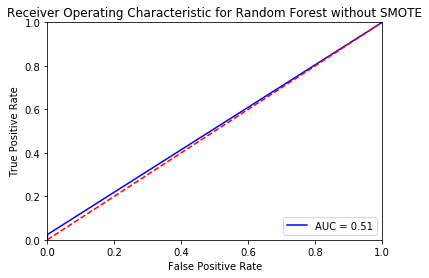

In [36]:
#computing the ROC curve without cross validation
# Compute ROC curve and ROC area for each class
#plotting Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Random Forest without SMOTE')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [38]:
#with Smote
sm = SMOTE()
features,labels = sm.fit_sample(car_features,car_label)


In [64]:
#first make the data standarised before applying the PCA
features = StandardScaler().fit_transform(features)

#divide the data into training and testing.
X_train,X_test,y_train,y_test = train_test_split(features,labels,random_state=3,test_size=0.25)


ValueError: Found input variables with inconsistent numbers of samples: [15419, 28992]

In [40]:
#applying PCA
pca = PCA(.95)
pca.fit(X_train)
newX_train = pca.transform(X_train)
newX_test = pca.transform(X_test)
print(type(newfeatures))
print(newfeatures.shape)
a = pca.explained_variance_ratio_
print(sum(a))

<class 'numpy.ndarray'>
(15419, 69)
0.951763253535


In [41]:
#model object
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
print('Random forest classifier:')
predicted = model.predict(X_test)
print(type(predicted),predicted.shape,predicted)
print('Accuracy is ',round(accuracy_score(y_test,model.predict(X_test)) * 100,2))


Random forest classifier:
<class 'numpy.ndarray'> (7248,) [1 1 0 ..., 0 0 1]
Accuracy is  97.16


In [43]:
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix:\n",cm)
TN, FP, FN, TP = cm.ravel()

print("Accuracy:",(TP+TN)/(TP+FP+FN+TN)*100)
print("Sensitivity:",TP/(TP+FN)*100)
print("Specificity:",TN/(TN+FP)*100)

Confusion Matrix:
 [[3567   56]
 [ 150 3475]]
Accuracy: 97.1578366446
Sensitivity: 95.8620689655
Specificity: 98.4543196246


In [44]:
#converting pandas.core.series.Series to numpy.ndarray
ytest = pd.Series(y_test).values
print((ytest.shape[0]))
print(predicted.shape[0])
print(ytest)
print()

7248
7248
[1 1 0 ..., 0 0 1]



In [45]:
#find the index where both are 1.
count = 0
fault = 0
predictedfault = 0
for i in range(predicted.shape[0]):
    
    if((predicted[i] == 1) and (ytest[i] == 1)):
        count += 1
    if(ytest[i] == 1):
        fault += 1
    if(predicted[i]==1):
        predictedfault += 1
print("No of fraud cases:",fault)
print("No of fauld cases predicted by model:",predictedfault)
print("No of fraud correctly predicted  as fault:",count)

No of fraud cases: 3625
No of fauld cases predicted by model: 3531
No of fraud correctly predicted  as fault: 3475


In [46]:
print(ytest.shape)
print(predicted.shape)

(7248,)
(7248,)


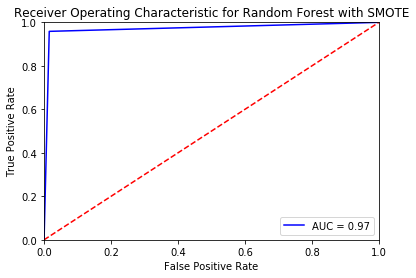

In [47]:
#computing the ROC curve without cross validation

# Compute ROC curve and ROC area for each class
#plotting Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic for Random Forest with SMOTE')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [103]:
# CROSS_VALIDATION: 10-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics


In [104]:
clf = RandomForestClassifier(n_estimators=100)
predicted = cross_val_predict(clf,features,labels, cv=10)


In [105]:
metrics.accuracy_score(labels, predicted) 

0.97285458057395147

In [106]:
#plotting ROC CURVE for cross validation


In [122]:
# Run classifier with cross-validation and plot ROC curves
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

cv = StratifiedKFold(n_splits=2)

In [123]:
clf = RandomForestClassifier(n_estimators=25)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, labels.shape[0])
print(features.shape)
print(type(features))

i = 0

(28992, 97)
<class 'numpy.ndarray'>


In [124]:
print(type(mean_fpr))
print(mean_fpr.shape)

<class 'numpy.ndarray'>
(28992,)


In [125]:
for train, test in cv.split(features, labels):
    probas_ = clf.fit(features[train], labels[train]).predict_proba(features[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(labels[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

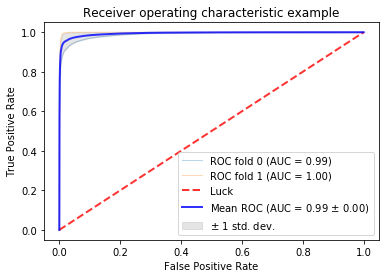

In [126]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()